### Crappify

Crappifies images and saves them, getting things ready for image enhancement. Simply put `.jpeg` files in in a folder named `input`

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import string
import fastai
from fastai.vision import *
from fastai import *
from fastai.callbacks import *
from multiprocessing import Pool
from fastai.utils.mem import *
import PIL
from PIL import ImageDraw, ImageFont
from tqdm import tqdm_notebook as tqdm
import gc

#### This notebook is inspired from J. Howard's lecture on DeepLearing,
##### he came up with 'crrapify' as the name of function.(and lots of other great stuff) <3

In [89]:
data = Path('./input')
BS = 64
from torchvision.models import vgg16_bn
SIZE = 320
SAVE_ORIG = True

In [90]:
#generates a random string of n1 length or of random length between n1 and n2, if n2 is provided
def randstr(n1, n2=None):
    n = n1 if n2 is None else np.random.randint(n1, n2+1)
    return ''.join(random.choices(string.printable +string.ascii_letters*3 + ' ', k=n))

Fetch fonts for writing random strings on images

In [ ]:
!wget https://anupam.gq/liberation_sans.zip
!unzip liberation_sans.zip
!ls

In [91]:
from fastai.vision.data import ImageList

src = ImageList.from_folder(data)
src

ImageList (18327 items)
Image (3, 1944, 2592),Image (3, 1944, 2592),Image (3, 1944, 2592),Image (3, 1944, 2592),Image (3, 1944, 2592)
Path: input/flickr30k_images/flickr30k_images/flickr30k_images

## Crappification logic
  **First image is transformed**
   * First of all, image is resized to the required output size and saved in High quality
   * Next, image is sampled to a smaller size, randomly chosen in range of (.5 - .9)
   * Random irrregularities are added to the image (jitter)
   * Brightness and contrast are randomly changed
   
**Random text is written on images and saved**
   * With 50% chance we write some garbage text on images in any of the downloaded fonts, half of them are white other half could be of any colour
   * Then, the images are resampled using bilinear interpolatin to the output size
   * Images are saved then with random JPEG picture quality between range 10-60 (poor - good)

In [92]:
!rm -rf crappy hr
!mkdir crappy hr

In [100]:
from fastai.vision.transform import *
from fastai.vision.image import *
from fastai.vision.data import *

crappy_tfms = [jitter(magnitude=(-0.004, 0.004)), brightness(change=(0.25, 0.75)), contrast(scale=(0.65, 1.45))]

def crappify(fn, size=SIZE, path=Path('./crappy'), hr=Path('./hr'), path_hr=data, save_orig=SAVE_ORIG):
    crappy_dest = path/fn.relative_to(path_hr)
    
    img = open_image(fn)
    img.resize((3, *resize_to(img, size+1, use_min=True)))
    img.refresh()
    
    if save_orig:
        img.save(hr/Path(fn).name)
        
    fct = (np.random.rand()*0.5 + 0.4)
    sampled_sz = 3, *resize_to(img, int(size*fct), use_min=True)

    img = img.resize(sampled_sz)
    img = img.apply_tfms(crappy_tfms)
    img = PIL.Image.fromarray(np.uint8(image2np(img.data)*255))
    if np.random.rand() > 0.5 :  ##writing random text
        w, h= img.size
        fill = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)) if np.random.rand() > 0.5 else (255,255,255)
        pos = np.random.randint(0,w//2), np.random.randint(0,w//2)
        fontnames = list(Path('.').glob('*.ttf'))
        fontname = str(fontnames[np.random.randint(len(fontnames))])
        ImageDraw.Draw(img).text(pos, randstr(np.random.randint(3, 15)), fill=fill, font=ImageFont.truetype(fontname, np.random.randint(8, 21)))
        del fill, pos, fontname,fontnames, w, h
        
    targ_sz = resize_to(img, size+1, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(crappy_dest, quality=np.random.randint(10, 60))
    
    del img, targ_sz, crappy_dest, fct, sampled_sz
    gc.collect()

## How these images look like?


In [101]:
def plots_f(rows, cols, width, height, **kwargs):
    ind = np.random.randint(0, len(src.items)-rows)
    for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten()):
        if i%3 == 0:
            ind += 1
            crappify(src.items[ind-1], 256)
            ax.title.set_text('original')
            open_image('hr/'+src.items[ind-1].name).show(ax=ax)
        else:
            crappify(src.items[ind-1], 256)
            ax.title.set_text('crappy')
            open_image('crappy/' + src.items[ind-1].name).show(ax=ax)

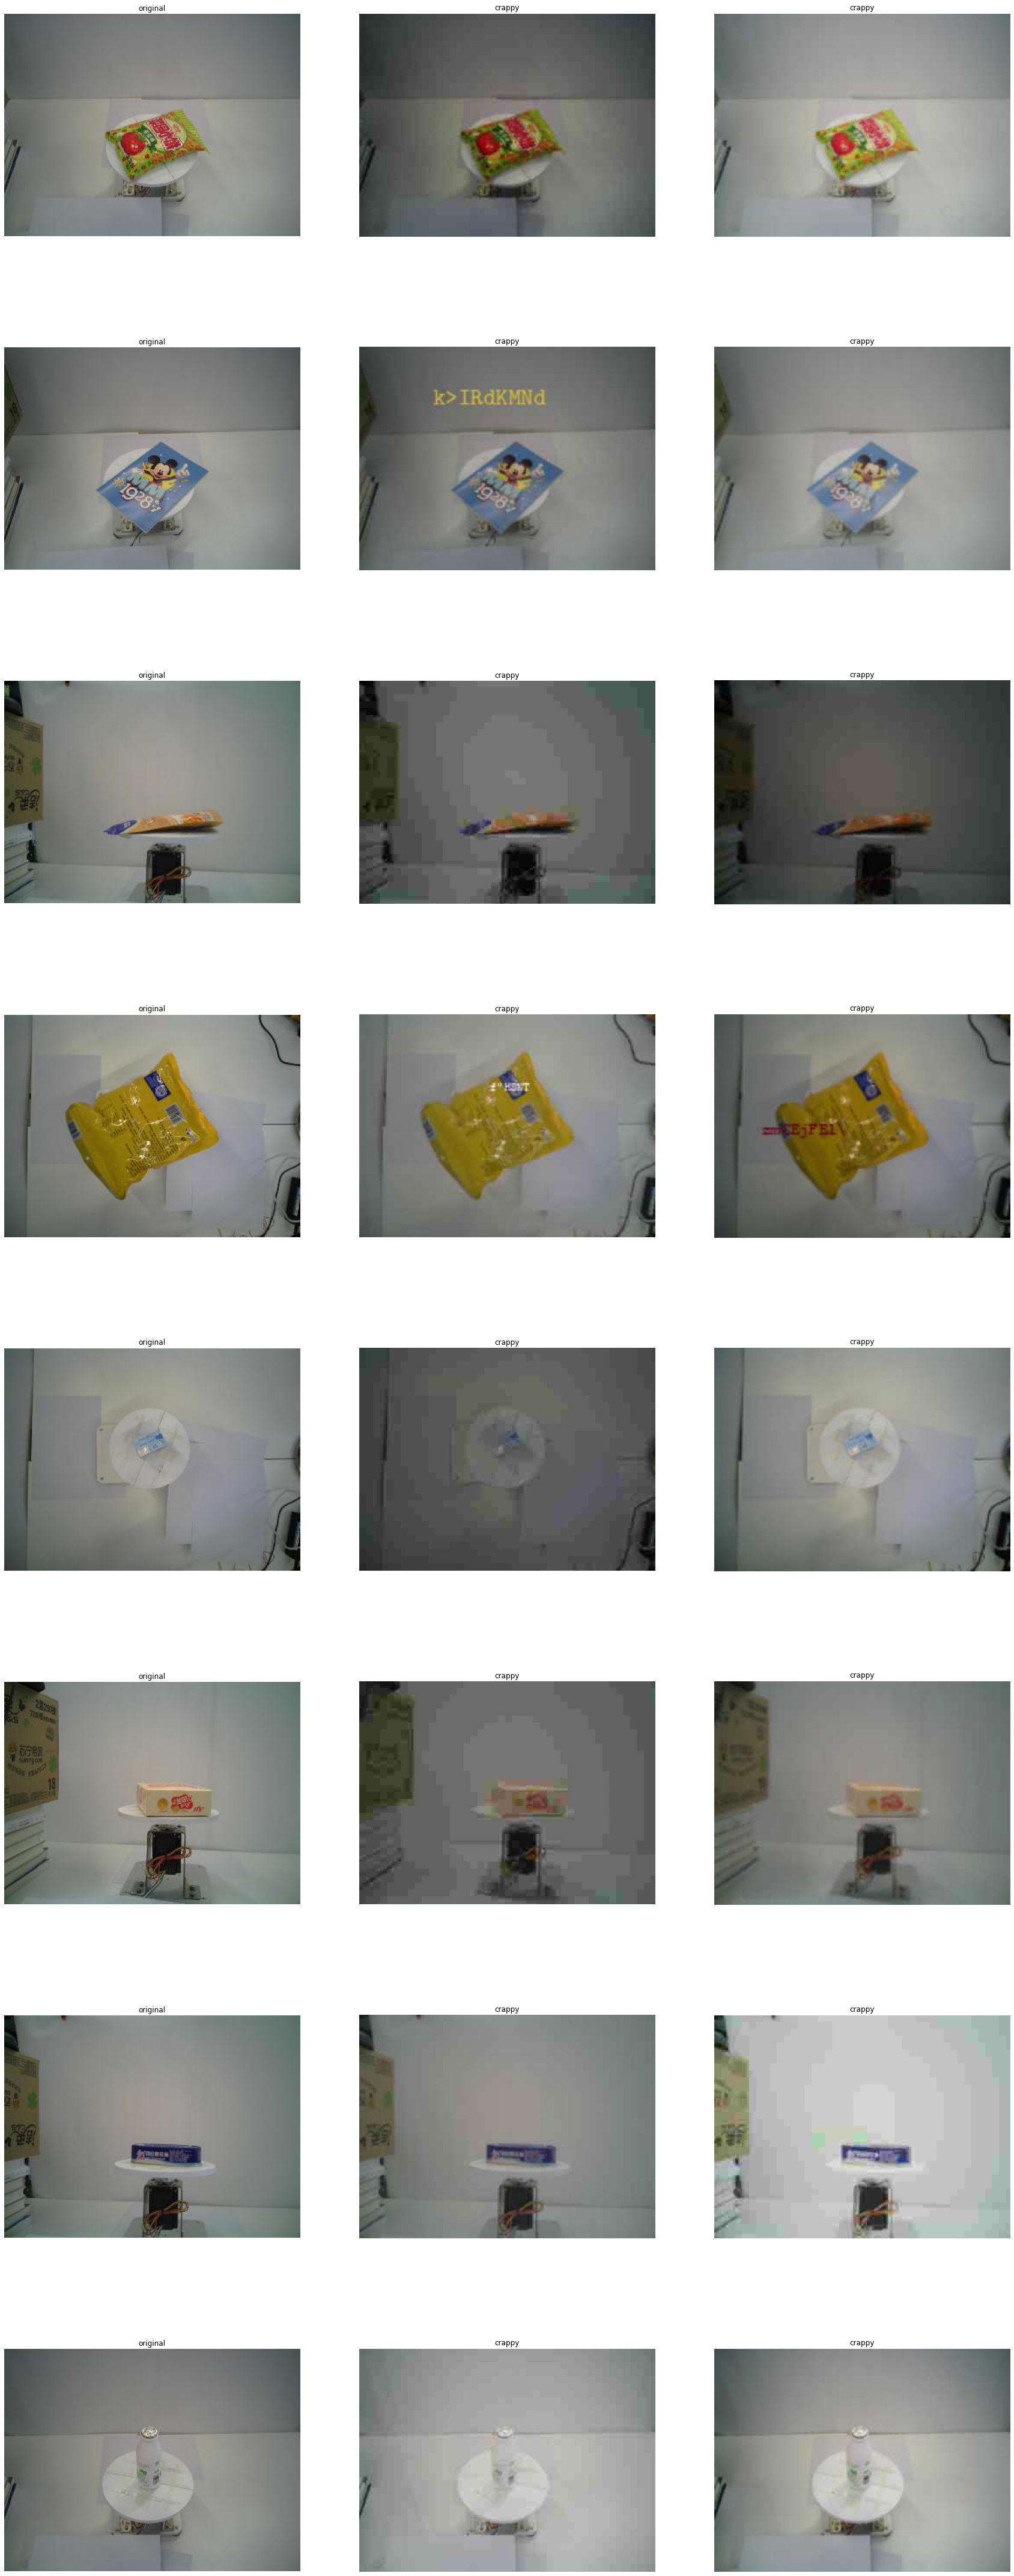

In [102]:
plots_f(8,3,30,80)

  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default b

  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


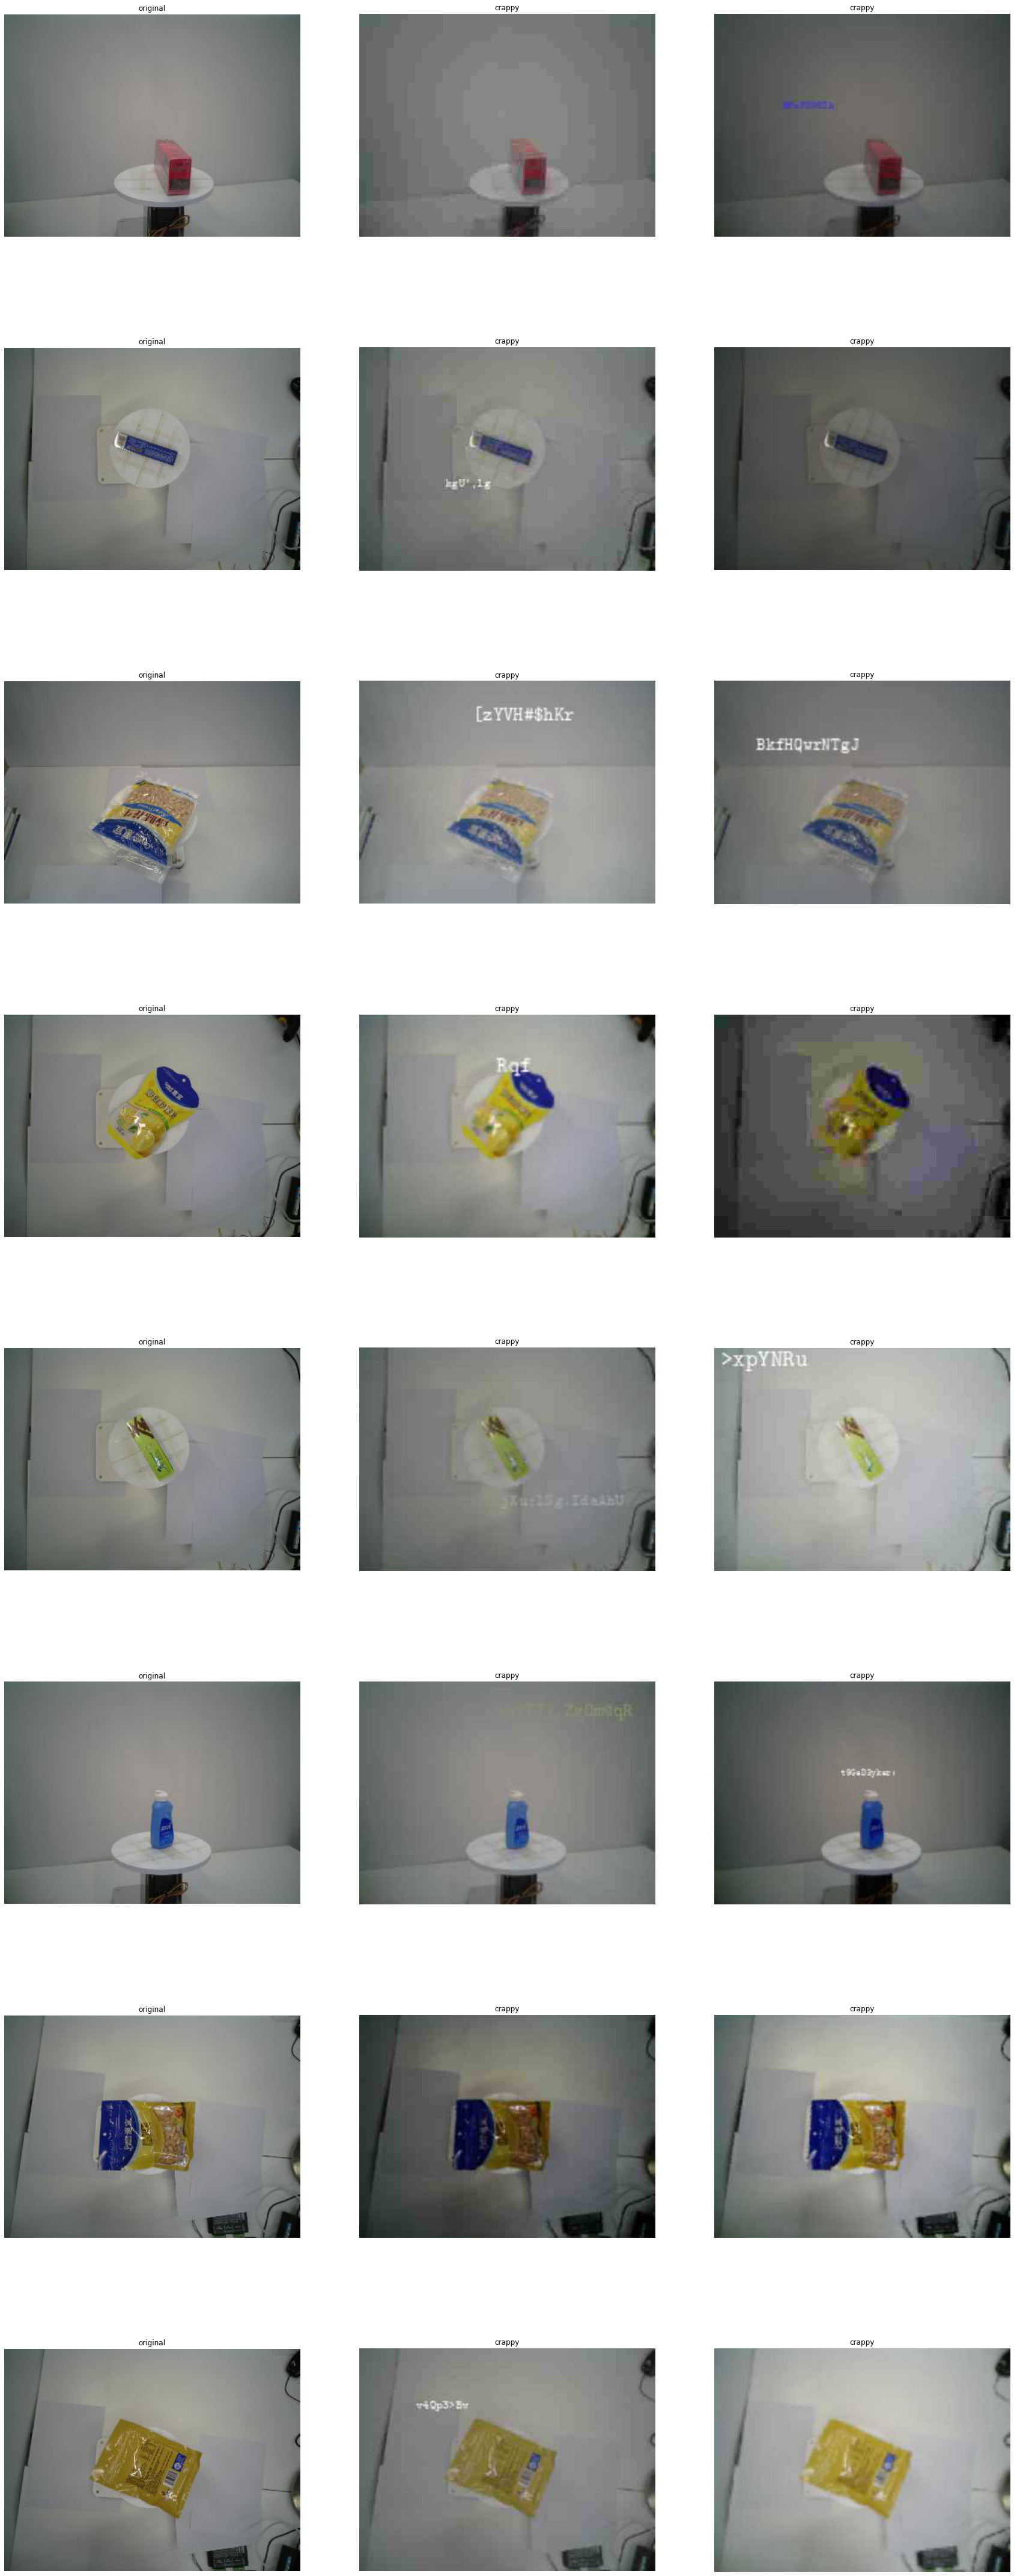

In [103]:
plots_f(8,3,30,80)

  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default b

  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


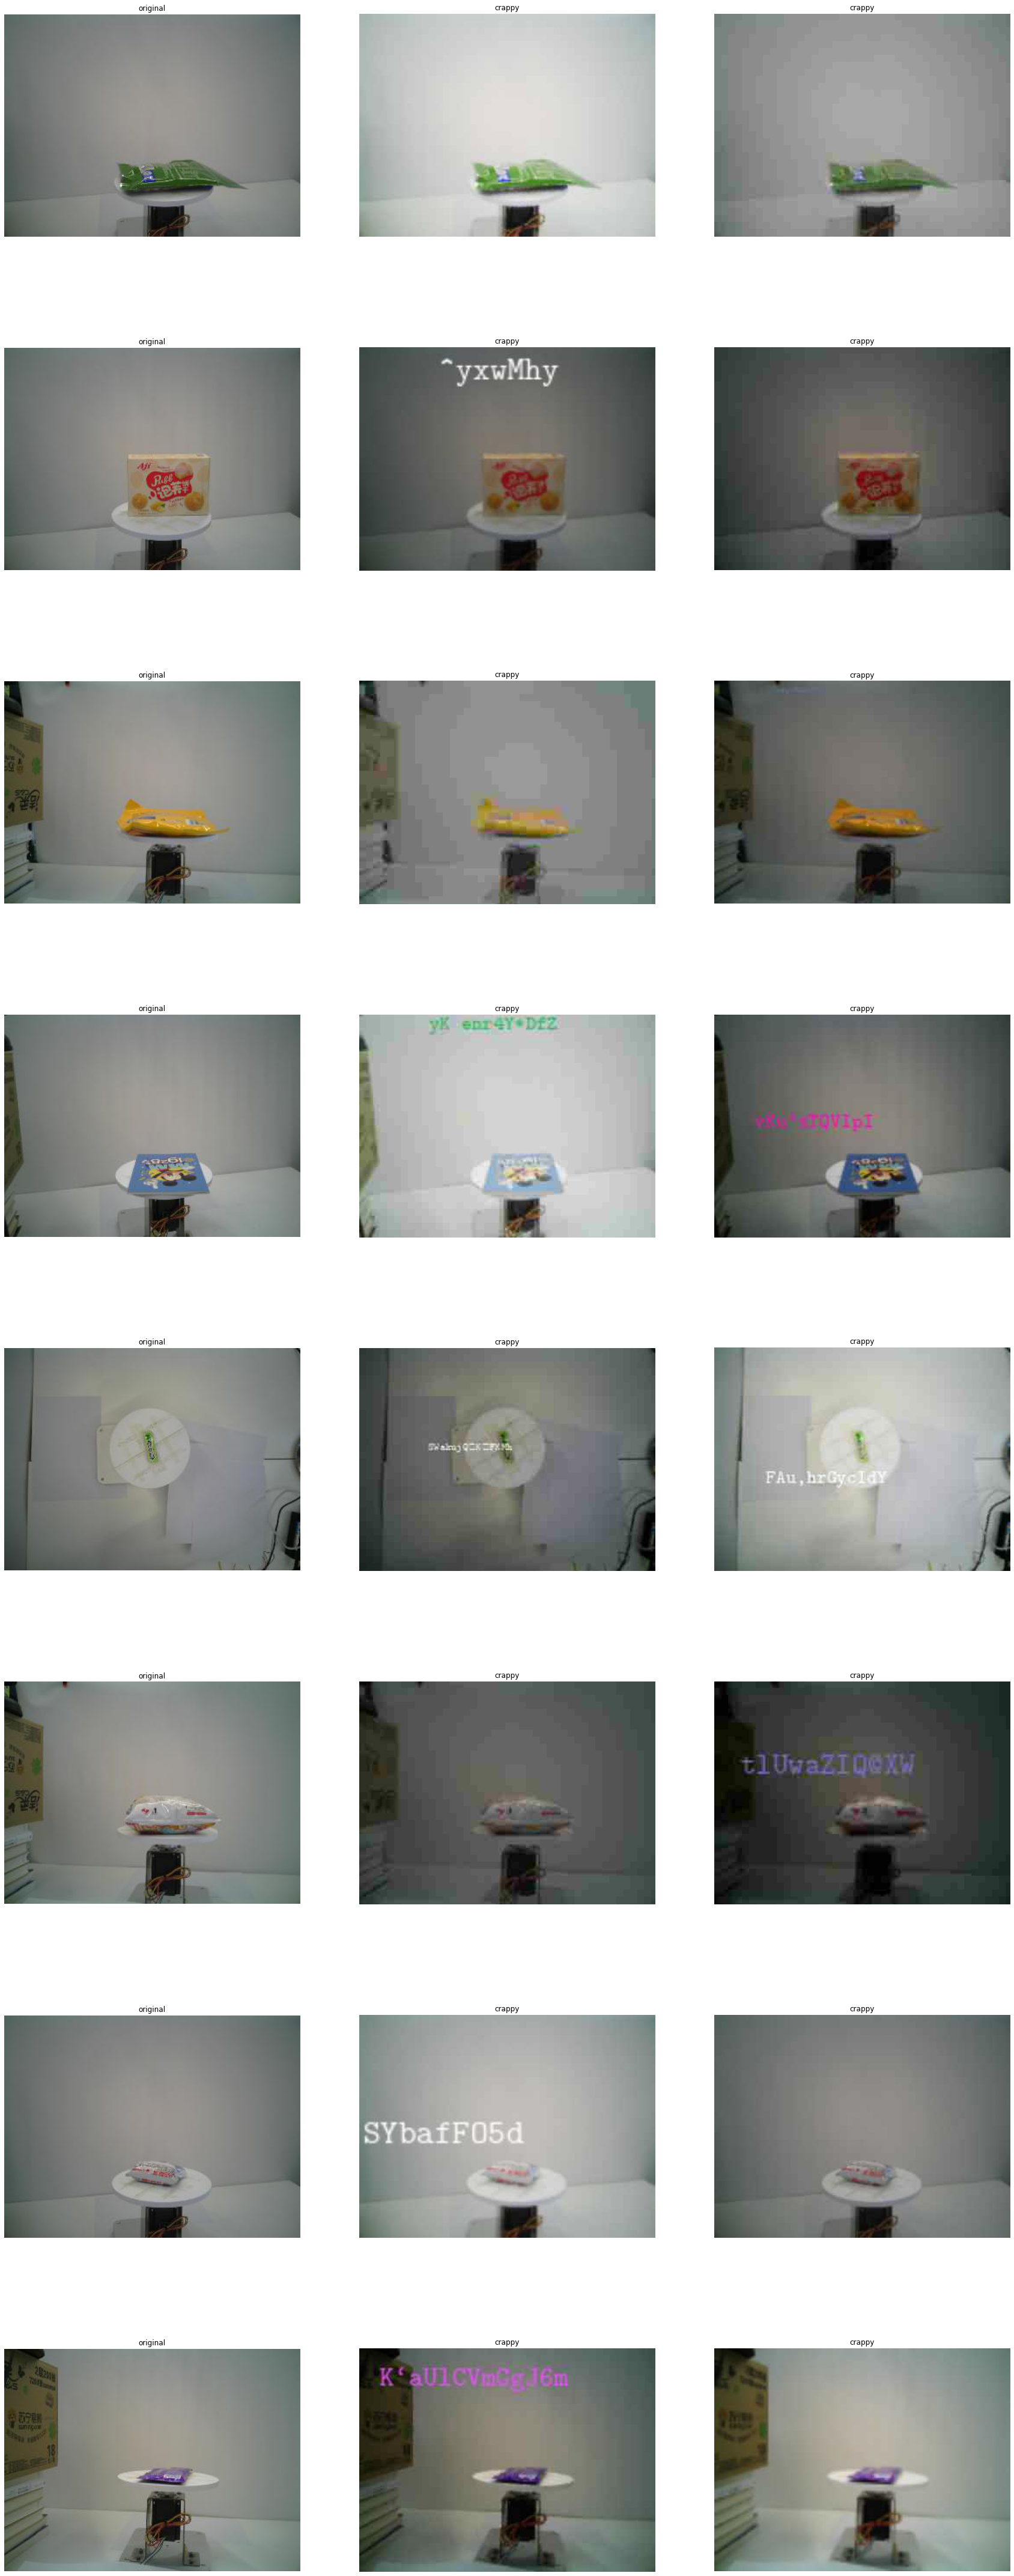

In [104]:
plots_f(8,3,30,80)

### generate and save those images in an archive

In [105]:
!rm -rf crappy/* hr/*

In [106]:
!ls

Crappify-imgs.ipynb             hr
LiberationSans-Bold.ttf         input
LiberationSans-BoldItalic.ttf   pretrain-gan-feature-loss.ipynb
LiberationSans-Italic.ttf       pretrain-gan-mse.ipynb
LiberationSans-Regular.ttf .ttf requirements.txt
README.md                       server
crappy                          train-gan-l1-and-features.ipynb
env                             train-gan-mse.ipynb


In [113]:
def save():
    n_archive = 0
    for i in tqdm(range(0, src.items.shape[0], 250)):
        items = src.items[i:min(src.items.shape[0], i+250)].copy()

        for item in items:
            crappify(item)

        if n_archive == 0:
            !tar -cf crappy_{SIZE}.tar crappy/*
            if SAVE_ORIG:
                !tar -cf hr.tar hr/*
        else:
            !tar -rf crappy_{SIZE}.tar crappy/*
            if SAVE_ORIG:
                !tar -rf hr.tar hr/*

        !rm -rf crappy/*
        if SAVE_ORIG:
            !rm -rf hr/*
        n_archive += 1
        del items
        gc.collect()

In [ ]:
save()

<ipython-input-113-d323b82c059d>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, src.items.shape[0], 250)):


  0%|          | 0/74 [00:00<?, ?it/s]

In [ ]:
SAVE_ORIG = True
SIZE = 256
save()

In [ ]:
rm -rf *.ttf AUTHORS README hr crappy License.txt COPYING ChangeLog

In [ ]:
## saving all image names in a csv file

pnames = !tar -tf crappy_256.tar
pnames = map(Path, pnames)
fnames = []
for pname in pnames: fnames.append(pname.name)

In [ ]:
pd.DataFrame(fnames, columns=['name']).to_csv('files.csv', index=False)